In [135]:
import numpy as np
import matplotlib
import os
import cv2
from skimage import io
from skimage import color, exposure, transform
from PIL import Image, ImageChops, ImageDraw, ImageOps, ImageFilter 
import imutils
import argparse
import ntpath
import sys
import matplotlib.pyplot as plt

In [136]:
def load_templates(directory):
    paths = []
    for files in os.listdir(directory):
        if (files != ".DS_Store"):
            paths.append(directory+'/'+files)
    return paths

In [137]:
def manipulate_images(paths):
    
    for image_path in paths:
        
        
        
        img = Image.open(image_path)
        pix = img.load()
        
        
        borders = []
        roi_right = []
        roi_left = []
        
        for y in range(0,img.size[1]):
            
            found = False
            
            for x in range(1,img.size[0]):

                r = pix[x,y][0]
                g = pix[x,y][1]
                b = pix[x,y][2]
                
                prev_r = pix[x-1,y][0]
                prev_g = pix[x-1,y][1]
                prev_b = pix[x-1,y][2]
                
                if ((abs(prev_r-r)>=20) or (abs(prev_g-g)>=20) or (abs(prev_b-b)>=20)):
                    roi_right.append([x,y])
                    for i in range(0,x):
                        borders.append([i,y])
                    found = True
                    break
            
            
            
            if (found == False):
                for i in range(0,img.size[0]-1):
                    borders.append([i,y])
            
              
            for x in range(img.size[0]-1,1,-1):
                
                r = pix[x,y][0]
                g = pix[x,y][1]
                b = pix[x,y][2]
                
                prev_r = pix[x-1,y][0]
                prev_g = pix[x-1,y][1]
                prev_b = pix[x-1,y][2]
                
                if ((abs(prev_r-r)>=20) or (abs(prev_g-g)>=20) or (abs(prev_b-b)>=20)):
                    roi_left.append([x,y])
                    for i in range(x,img.size[0]-1):
                        borders.append([i,y])
                    break
         
        
        image = cv2.imread(image_path, -1)
        
        b_channel, g_channel, r_channel = cv2.split(image)
        alpha_channel = np.ones(b_channel.shape, dtype=b_channel.dtype) * 255 #creating a dummy alpha channel image.
        image_RGBA = cv2.merge((b_channel, g_channel, r_channel, alpha_channel))
        
        height, width, channels = image.shape
        
        #Deleting white perimeter of shape
        for i in range(0,img.size[0]-1):
            image_RGBA[0,i][3] = 0
            image_RGBA[img.size[1]-1,i][3] = 0
        
        for i in range(0,img.size[1]-1):
            image_RGBA[i,0][3] = 0
            image_RGBA[i,img.size[0]-1][3] = 0
            
        
        
        for border in borders:
            image_RGBA[border[1],border[0]][3] = 0
            
        
        head, tail = ntpath.split(image_path)
        
        title,extension = tail.split('.')
        cv2.imwrite("Traffic_Signs_Templates/Processed_Images/"+title+".png", image_RGBA)
        
        
        

In [138]:
directory = 'Traffic_Signs_Templates/Images'
paths = load_templates(directory)
manipulate_images(paths)

In [139]:
def find_coeffs(pa, pb):
    matrix = []
    for p1, p2 in zip(pa, pb):
        matrix.append([p1[0], p1[1], 1, 0, 0, 0, -p2[0]*p1[0], -p2[0]*p1[1]])
        matrix.append([0, 0, 0, p1[0], p1[1], 1, -p2[1]*p1[0], -p2[1]*p1[1]])

    A = np.matrix(matrix, dtype=np.float)
    B = np.array(pb).reshape(8)

    res = np.dot(np.linalg.inv(A.T * A) * A.T, B)
    return np.array(res).reshape(8)

In [200]:
def img_transform(paths):
    
    for image_path in paths:
        img = cv2.imread(image_path)
        rows,cols,ch = img.shape
        
        

        pts1 = np.float32([[50,50],[200,50],[50,200]])
        pts2 = np.float32([[100,100],[200,50],[100,250]])

        M = cv2.getAffineTransform(pts1,pts2)

        dst = cv2.warpAffine(img,M,(cols,rows))

        plt.subplot(121),plt.imshow(img),plt.title('Input')
        plt.subplot(122),plt.imshow(dst),plt.title('Output')
        imwrite("out.png")
        plt.show()
        
        break

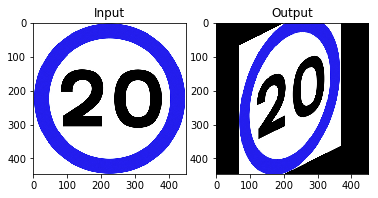

In [201]:
directory = 'Traffic_Signs_Templates/Processed_Images'
paths = load_templates(directory)
img_transform(paths)